In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")

print("Path to dataset files:", path)

100%|██████████| 2.40M/2.40M [00:00<00:00, 59.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5


In [2]:
import pandas as pd

In [5]:
import pandas as pd

file_path = "/root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5/KaggleV2-May-2016.csv"
df = pd.read_csv(file_path)




In [7]:
# Display first five rows
from IPython.display import display, Markdown
display(Markdown("### Glimpse Of The Dataset:"))
df.head().style.set_properties(**{
    "background-color": "#8B4513",
    "color": "white",
    "border": "1.5px solid black"
})

### Glimpse Of The Dataset:

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.000000,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.000000,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.000000,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.000000,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.000000,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Checking for missing values and basic info
df.info()  # Shows column names and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df.isnull().sum()  # Check for missing values

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [10]:
## Renaming the colunms for readability
df.rename(columns={
    "No-show": "No_Show",
    "AppointmentID": "Appointment_ID",
    "ScheduledDay": "Scheduled_Date",
    "AppointmentDay": "Appointment_Date",
    "SMS_received": "Reminder_Sent"
}, inplace=True)

# Convert column names to lowercase
df.columns = df.columns.str.lower()

df.head()


,patientid,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,reminder_sent,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Convert date colunms to date formate
df["scheduled_date"] = pd.to_datetime(df["scheduled_date"])
df["appointment_date"] = pd.to_datetime(df["appointment_date"])


In [12]:
df.head()

,patientid,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,reminder_sent,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
## Feature engineering
## Create New Features (Time Between Scheduling & Appointment)
## Calculate how many days between scheduling and appointment

df["days_between"] = (df["appointment_date"] - df["scheduled_date"]).dt.days


In [16]:
df.head()

,patientid,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,reminder_sent,no_show,days_between
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [17]:
## Encode target variable
## Yes : 1 and N0 : 0
df["no_show"] = df["no_show"].map({"Yes": 1, "No": 0})


In [18]:
df.head()

,patientid,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,reminder_sent,no_show,days_between
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


In [19]:
#  Create a Feature for A/B Testing
# We assume that SMS_received (Reminder_Sent) is the indicator of different reminder strategies:

#Group A (Control): Patients who did not receive an SMS (Reminder_Sent = 0)
#Group B (Treatment): Patients who received an SMS (Reminder_Sent = 1)

df["ab_group"] = df["reminder_sent"].map({0: "A_Control", 1: "B_Treatment"})


In [21]:
df.head(30)

,patientid,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,reminder_sent,no_show,days_between,ab_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,A_Control
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,A_Control
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,A_Control
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,A_Control
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,A_Control
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1,A_Control
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1,A_Control
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1,A_Control
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0,-1,A_Control
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1,A_Control


In [ ]:
#  Analyze No-Show Rates for Each Group
#Now, let’s analyze the no-show rates for both groups.

             Total_Appointments  No_Show_Count  No_Show_Rate
ab_group                                                    
A_Control                 75045          12535     16.703311
B_Treatment               35482           9784     27.574545


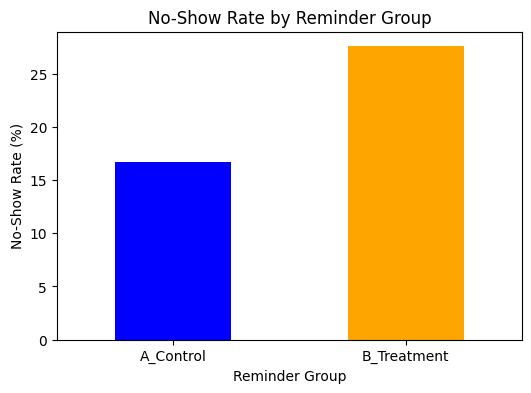

In [23]:
ab_summary = df.groupby("ab_group")["no_show"].agg(["count", "sum", "mean"])
ab_summary.columns = ["Total_Appointments", "No_Show_Count", "No_Show_Rate"]
ab_summary["No_Show_Rate"] = ab_summary["No_Show_Rate"] * 100  # Convert to percentage

# Display A/B testing summary using Pandas
print(ab_summary)

# Alternatively, display it in a more readable format
import matplotlib.pyplot as plt

# Bar plot for No-Show Rate comparison
plt.figure(figsize=(6,4))
ab_summary["No_Show_Rate"].plot(kind="bar", color=["blue", "orange"])
plt.title("No-Show Rate by Reminder Group")
plt.xlabel("Reminder Group")
plt.ylabel("No-Show Rate (%)")
plt.xticks(rotation=0)
plt.show()


**Interpretation of A/B Testing Results**

The results show a higher no-show rate in the treatment group (B_Treatment) compared to the control group (A_Control).

**Surprising Outcome**

The expectation was that sending a reminder (B_Treatment) would decrease the no-show rate.

However, the no-show rate actually increased from 16.70% to 27.57% when reminders were sent.

This suggests that the reminder strategy might not be effective or could have unintended consequences (e.g., reminding people but not giving them an easy way to reschedule).

**Hypothesis Testing**

In [24]:
import scipy.stats as stats
import numpy as np

# Define the observed values from the dataset
observed = np.array([[12535, 75045 - 12535],  # A_Control: No-Show, Show-Up
                     [9784, 35482 - 9784]])  # B_Treatment: No-Show, Show-Up

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Display results
chi2, p


(1766.0676572637585, 0.0)

**Interpretation**

Since the p-value is extremely small (p < 0.05), we reject the null hypothesis
(H₀).

This means there is a statistically significant difference in no-show rates between the two groups.

The reminder strategy (B_Treatment) is associated with a higher no-show rate, which is unexpected.

**Possible Explanations**

Reminder Fatigue: Patients may ignore the reminder if they receive too many notifications.

No Rescheduling Option: If patients receive reminders but cannot easily reschedule, they might just ignore the appointment.

Demographic Factors: The treatment group may have different patient characteristics affecting attendance.

<ipython-input-25-ee54f1fed12a>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = df.groupby("age_group")["no_show"].mean() * 100
<ipython-input-25-ee54f1fed12a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_summary.index, y=age_summary.values, palette="coolwarm")


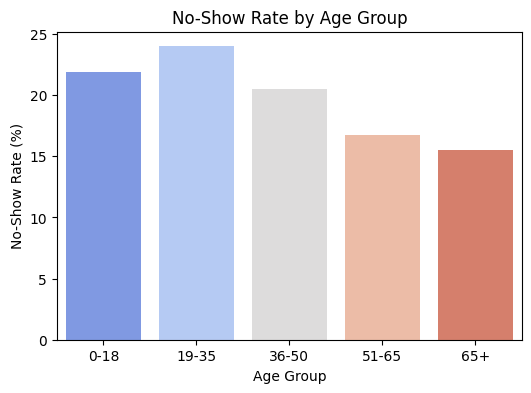

In [25]:
# No show rate by age group
import seaborn as sns
import matplotlib.pyplot as plt

# Create age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ["0-18", "19-35", "36-50", "51-65", "65+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Group by age group and calculate no-show rate
age_summary = df.groupby("age_group")["no_show"].mean() * 100

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=age_summary.index, y=age_summary.values, palette="coolwarm")
plt.title("No-Show Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("No-Show Rate (%)")
plt.show()


In [29]:
# No show rate by medical conditions
# Calculate no-show rates for different conditions
conditions = ["hipertension", "diabetes", "alcoholism", "handcap"]
condition_summary = df.groupby(conditions)["no_show"].mean().reset_index()

# Display the data
condition_summary



,hipertension,diabetes,alcoholism,handcap,no_show
0,0,0,0,0,0.209273
1,0,0,0,1,0.201287
2,0,0,0,2,0.134021
3,0,0,0,3,0.222222
4,0,0,0,4,0.333333
5,0,0,1,0,0.216441
6,0,0,1,1,0.096774
7,0,0,1,2,1.000000
8,0,0,1,3,0.000000
9,0,1,0,0,0.203579


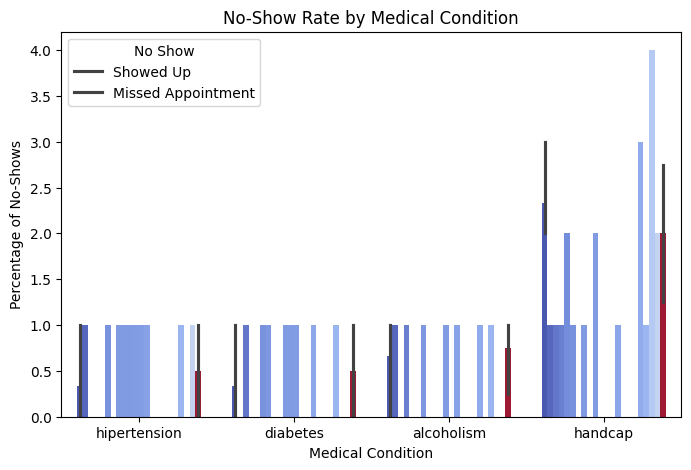

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe for better visualization
condition_melted = condition_summary.melt(id_vars="no_show", var_name="Condition", value_name="Presence")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Condition", y="Presence", hue="no_show", data=condition_melted, palette="coolwarm")
plt.title("No-Show Rate by Medical Condition")
plt.ylabel("Percentage of No-Shows")
plt.xlabel("Medical Condition")
plt.legend(title="No Show", labels=["Showed Up", "Missed Appointment"])
plt.show()


In [ ]:
# Save to CSV if needed
condition_summary.to_csv("no_show_rate_by_condition.csv", index=False)


**No-Show Rate vs. Days Between Scheduling & Appointment.**

If reminders are sent too close to the appointment date, they may not be effective.

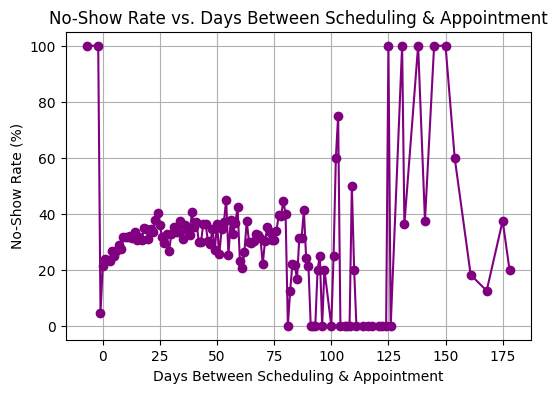

In [30]:
# Group by days_between and calculate no-show rate
days_summary = df.groupby("days_between")["no_show"].mean() * 100

# Plot
plt.figure(figsize=(6,4))
days_summary.plot(kind="line", marker="o", color="purple")
plt.title("No-Show Rate vs. Days Between Scheduling & Appointment")
plt.xlabel("Days Between Scheduling & Appointment")
plt.ylabel("No-Show Rate (%)")
plt.grid()
plt.show()


**A/B Testing on Patient Appointment Reminders**

 Conducted an A/B test on 100,000+ patient appointments to analyze the impact of SMS reminders on no-show rates. Found that reminders increased no-show rates (27.57% vs. 16.70%), especially among younger patients, disabled individuals, and long-scheduled appointments.

 Recommended personalized reminders (WhatsApp/social media for younger patients), phone call follow-ups for disabled/medically challenged individuals, and additional reminders closer to long-scheduled appointments to improve attendance.

 Used Python, SQL, and statistical tests (Chi-Square, t-test) for analysis.